In [1]:
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from datetime import timedelta

In [2]:
# eeg_recording = pd.read_csv('../Sleep Data/raw_data_1/101/PSG_raw/C3.txt', sep=' ', skiprows=7, header=None)
# eeg_recording.columns = ['data']

In [3]:
# eeg_numpy = np.array(eeg_recording['data'])

In [4]:
# sleep_profile = pd.read_csv('../Sleep Data/raw_data_1/101/PSG_analysis_manual/Sleep profile.txt', sep=";", skiprows=7, header=None)
# sleep_profile.columns = ["time", "stage"]

In [5]:
rootdir = '../Sleep Data/'
sleep_profiles = []
eeg_recordings = []

for subdir, dirs, files in os.walk(rootdir):
    subdir_split = subdir.split('/')
    subdir_und = subdir_split[-1].split('_')
    
    for file in files:        
        if (file == 'Sleep profile.txt' ) & ('PSG_analysis_manual' in subdir_split):                            
            sleep_profile = pd.read_csv(os.path.join(subdir, file), sep=";", skiprows=7, header=None)
            sleep_profile.columns = ["time", "stage"]
#             sleep_profile_numpy = np.array(sleep_profile[:-1]['stage'])            
            sleep_profiles.append(sleep_profile[:-1]['stage'])            
            
        if('PSG_raw' in subdir_split) & (file == 'C3.txt'):
            eeg_recording = pd.read_csv(os.path.join(subdir, file), sep=' ', skiprows=7, header=None)
            eeg_recording.columns = ['data']
            eeg_recording = eeg_recording[:-(len(eeg_recording)%(128*30))]            
            eeg_numpy = np.array(eeg_recording['data'])
            data = np.array(np.split(eeg_numpy, len(eeg_numpy)/(128*30)))
            eeg_recordings.append(data)


In [6]:
print('sleep profiles: ', len(sleep_profiles))
print('eeg recordings: ', len(eeg_recordings))

sleep profiles:  44
eeg recordings:  44


In [7]:
sleep_profiles = np.array(sleep_profiles)
eeg_recordings = np.array(eeg_recordings)

In [8]:
for i in range(len(sleep_profiles)):
    if len(sleep_profiles[i]) > len(eeg_recordings[i]):
        sleep_profiles[i] = sleep_profiles[i][:-(len(sleep_profiles[i]) - len(eeg_recordings[i]))]
    elif len(eeg_recordings[i]) > len(sleep_profiles[i]):
        eeg_recordings[i] = eeg_recordings[i][:-(len(eeg_recordings[i]) - len(sleep_profiles[i]))]            

In [9]:
# for i in range(len(sleep_profiles)):
#     print('profile', len(sleep_profiles[i]))
#     print('data', len(eeg_recordings[i]))    

In [10]:
all_sleep_profiles = []
for i in range(len(sleep_profiles)):
    all_sleep_profiles.append(np.array(sleep_profiles[i]).astype('str'))

In [11]:
all_sleep_profiles = np.concatenate( np.array(all_sleep_profiles), axis=0)

In [12]:
all_eeg_recordings = np.concatenate(eeg_recordings, axis=0)

In [13]:
remove = []
for i in range(len(all_sleep_profiles)):
    if str(all_sleep_profiles[i]) == ' A':
        remove.append(i)
    elif str(all_sleep_profiles[i]) == ' Artefact':
        remove.append(i)
        
all_eeg_recordings_a = np.delete(all_eeg_recordings, remove, axis = 0)
all_sleep_profiles_a = np.delete(all_sleep_profiles, remove)

In [14]:
len(all_sleep_profiles_a)

44251

In [15]:
np.place(all_sleep_profiles_a, all_sleep_profiles_a==' Wake', [0])
np.place(all_sleep_profiles_a, all_sleep_profiles_a==' N1', [1])
np.place(all_sleep_profiles_a, all_sleep_profiles_a==' N2', [2])
np.place(all_sleep_profiles_a, all_sleep_profiles_a==' N3', [3])
np.place(all_sleep_profiles_a, all_sleep_profiles_a==' N4', [4])
np.place(all_sleep_profiles_a, all_sleep_profiles_a==' REM', [5])

In [16]:
all_sleep_profiles_a = all_sleep_profiles_a.astype('int32')

In [17]:
from modwt import modwt, modwtmra

ET = []

WT = []

count = 0

for element in all_eeg_recordings_a[:2000]:
    wt = modwt(element, 'db4', 6)
    WT.append(wt)
    E = []
    for w in wt:
        E.append(np.sum(np.abs(w) ** 2))
    print("E appended", count)
    ET.append(E)
    count += 1

E appended 0
E appended 1
E appended 2
E appended 3
E appended 4
E appended 5
E appended 6
E appended 7
E appended 8
E appended 9
E appended 10
E appended 11
E appended 12
E appended 13
E appended 14
E appended 15
E appended 16
E appended 17
E appended 18
E appended 19
E appended 20
E appended 21
E appended 22
E appended 23
E appended 24
E appended 25
E appended 26
E appended 27
E appended 28
E appended 29
E appended 30
E appended 31
E appended 32
E appended 33
E appended 34
E appended 35
E appended 36
E appended 37
E appended 38
E appended 39
E appended 40
E appended 41
E appended 42
E appended 43
E appended 44
E appended 45
E appended 46
E appended 47
E appended 48
E appended 49
E appended 50
E appended 51
E appended 52
E appended 53
E appended 54
E appended 55
E appended 56
E appended 57
E appended 58
E appended 59
E appended 60
E appended 61
E appended 62
E appended 63
E appended 64
E appended 65
E appended 66
E appended 67
E appended 68
E appended 69
E appended 70
E appended 71
E 

E appended 554
E appended 555
E appended 556
E appended 557
E appended 558
E appended 559
E appended 560
E appended 561
E appended 562
E appended 563
E appended 564
E appended 565
E appended 566
E appended 567
E appended 568
E appended 569
E appended 570
E appended 571
E appended 572
E appended 573
E appended 574
E appended 575
E appended 576
E appended 577
E appended 578
E appended 579
E appended 580
E appended 581
E appended 582
E appended 583
E appended 584
E appended 585
E appended 586
E appended 587
E appended 588
E appended 589
E appended 590
E appended 591
E appended 592
E appended 593
E appended 594
E appended 595
E appended 596
E appended 597
E appended 598
E appended 599
E appended 600
E appended 601
E appended 602
E appended 603
E appended 604
E appended 605
E appended 606
E appended 607
E appended 608
E appended 609
E appended 610
E appended 611
E appended 612
E appended 613
E appended 614
E appended 615
E appended 616
E appended 617
E appended 618
E appended 619
E appended

E appended 1094
E appended 1095
E appended 1096
E appended 1097
E appended 1098
E appended 1099
E appended 1100
E appended 1101
E appended 1102
E appended 1103
E appended 1104
E appended 1105
E appended 1106
E appended 1107
E appended 1108
E appended 1109
E appended 1110
E appended 1111
E appended 1112
E appended 1113
E appended 1114
E appended 1115
E appended 1116
E appended 1117
E appended 1118
E appended 1119
E appended 1120
E appended 1121
E appended 1122
E appended 1123
E appended 1124
E appended 1125
E appended 1126
E appended 1127
E appended 1128
E appended 1129
E appended 1130
E appended 1131
E appended 1132
E appended 1133
E appended 1134
E appended 1135
E appended 1136
E appended 1137
E appended 1138
E appended 1139
E appended 1140
E appended 1141
E appended 1142
E appended 1143
E appended 1144
E appended 1145
E appended 1146
E appended 1147
E appended 1148
E appended 1149
E appended 1150
E appended 1151
E appended 1152
E appended 1153
E appended 1154
E appended 1155
E append

E appended 1607
E appended 1608
E appended 1609
E appended 1610
E appended 1611
E appended 1612
E appended 1613
E appended 1614
E appended 1615
E appended 1616
E appended 1617
E appended 1618
E appended 1619
E appended 1620
E appended 1621
E appended 1622
E appended 1623
E appended 1624
E appended 1625
E appended 1626
E appended 1627
E appended 1628
E appended 1629
E appended 1630
E appended 1631
E appended 1632
E appended 1633
E appended 1634
E appended 1635
E appended 1636
E appended 1637
E appended 1638
E appended 1639
E appended 1640
E appended 1641
E appended 1642
E appended 1643
E appended 1644
E appended 1645
E appended 1646
E appended 1647
E appended 1648
E appended 1649
E appended 1650
E appended 1651
E appended 1652
E appended 1653
E appended 1654
E appended 1655
E appended 1656
E appended 1657
E appended 1658
E appended 1659
E appended 1660
E appended 1661
E appended 1662
E appended 1663
E appended 1664
E appended 1665
E appended 1666
E appended 1667
E appended 1668
E append

In [18]:
ET_np = np.array(ET)

In [19]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras import Input

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [21]:
ET_np_p = preprocessing.scale(ET_np)

In [44]:
# ET_np_p = np.reshape(ET_np_p, (ET_np_p.shape[0], 1, ET_np_p.shape[1]))

In [45]:
train_data, test_data, train_labels, test_labels = train_test_split(ET_np_p, all_sleep_profiles_a[:2000], test_size=0.33, random_state=42)

In [63]:
# Embedding
max_features = 3000
maxlen = 3840
embedding_size = 128

# Convolution
kernel_size = 16
filters = 128
pool_size = 4

# LSTM
lstm_output_size = 30

# Training
batch_size = 40
epochs = 25

In [64]:
model = Sequential()
# model.add(Embedding(max_features, embedding_size, input_length=maxlen))
# model.add(Dropout(0.25))
# model.add(Conv1D(filters,
#                  kernel_size,
#                  padding='valid',
#                  activation='relu',
#                  strides=2))
# model.add(MaxPooling1D(pool_size=pool_size))

model.add(LSTM(units=256,
               input_shape=(1,7), return_sequences = True))
model.add(Dropout(0.25))
model.add(LSTM(units=256, activation='relu',
               input_shape=(1,7)))
# model.add(LSTM(units=256, activation='relu', input_shape=(1,7)))
# model.add(Dropout(0.25))
# model.add(LSTM(units=512, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Activation('softmax'))

In [65]:
# model = Sequential()
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(2048, activation='relu'))
# model.add(Dense(2048, activation='relu'))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(6, activation='softmax'))

In [66]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
history = model.fit(train_data, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(test_data, test_labels))

Train on 1340 samples, validate on 660 samples
Epoch 1/25
1340/1340 [==============================] - 2s 2ms/sample - loss: 1.7092 - acc: 0.5187 - val_loss: 1.5437 - val_acc: 0.5485
Epoch 2/25
1340/1340 [==============================] - 0s 350us/sample - loss: 1.3580 - acc: 0.5634 - val_loss: 1.2066 - val_acc: 0.5864
Epoch 3/25
1340/1340 [==============================] - 0s 353us/sample - loss: 1.1263 - acc: 0.6418 - val_loss: 1.0335 - val_acc: 0.6182
Epoch 4/25
1340/1340 [==============================] - 0s 365us/sample - loss: 0.9833 - acc: 0.6478 - val_loss: 0.9417 - val_acc: 0.6227
Epoch 5/25
1340/1340 [==============================] - 0s 369us/sample - loss: 0.9127 - acc: 0.6560 - val_loss: 0.8758 - val_acc: 0.6894
Epoch 6/25
1340/1340 [==============================] - 1s 407us/sample - loss: 0.8599 - acc: 0.6910 - val_loss: 0.8430 - val_acc: 0.7015
Epoch 7/25
1340/1340 [==============================] - 1s 521us/sample - loss: 0.8277 - acc: 0.7097 - val_loss: 0.8320 - val_a

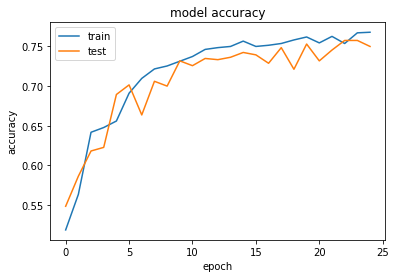

In [68]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

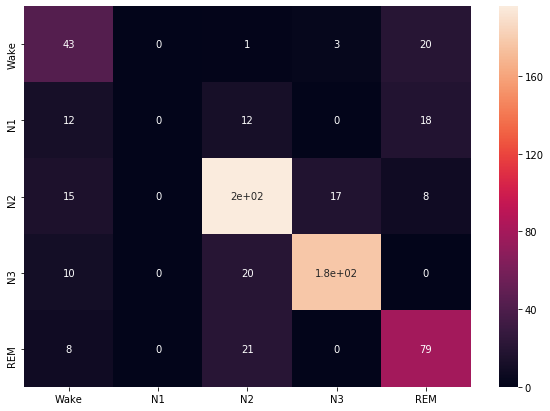

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pred = model.predict(test_data)

test_labels = test_labels.astype('int32')

confusion_matrix = confusion_matrix(test_labels, y_pred.argmax(axis=1))

df_cm = pd.DataFrame(confusion_matrix, index = ['Wake', 'N1', 'N2', 'N3', 'REM'],
                  columns = ['Wake', 'N1', 'N2', 'N3', 'REM'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)